# Thermal emission noise of HZG NIT ch4

Revised version 5.
2022-08-02 H. Akitaya (PERC, CIT)


1. F/10 -> F/6.1.
2. Calculate dichroic prism case.

## Instrumental parameters.

In [1]:
import sys
import os
import math

import numpy as np
import astropy.units as u

In [2]:
from hzgdev.phot import simimg

In [3]:
params = simimg.HZGParams()

In [4]:
# Get attributions.
attars = [x for x in dir(params) if not x.startswith('_')]

In [5]:
# Show attributions.
attars = [x for x in dir(params) if not x.startswith('_')]
for attar in attars:
    print('params.{} = {}'.format(attar, getattr(params, attar)))

params.band_wls = {'o': [<Quantity 0.5 um>, <Quantity 0.9 um>], 'j': [<Quantity 0.9 um>, <Quantity 1.5 um>], 'h': [<Quantity 1.5 um>, <Quantity 2. um>], 'k': [<Quantity 2. um>, <Quantity 2.5 um>]}
params.bands = ['o', 'j', 'h', 'k']
params.d_tel = 0.3 m
params.darkrate = 0.3 1 / s
params.eff_tel = 0.63
params.elat = 45.0
params.fwhm = 1.5
params.n_frames = 5
params.n_pix = 9
params.pix_fov = 4.0 arcsec2
params.pixsize = 18.0 um
params.ron = 18.0
params.show = <bound method HZGParams.show of <hzgdev.phot.simimg.HZGParams object at 0x7fa8591e2b60>>
params.t_exp = 120.0 s


In [6]:
# fvalue = 6.1
fvalue = 6.1  # Correct f-value of HZG.
cone_solangle = 2.0 * np.pi * (1.0 - math.cos(math.atan(1.0/fvalue/2.0))) * u.sr

In [7]:
cone_solangle

<Quantity 0.02100141 sr>

Aperture and number of frames.

# Define possible band properties for ch4.

In [8]:
# Extend band information.
params.bands.extend(['k0', 'k1', 'k2', 'k3'])
params.band_wls.update({
    'k0': [2.0*u.um, 2.5*u.um],  # Original.
    'k1': [1.7*u.um, 2.1*u.um],  # Case 1.
    'k2': [1.7*u.um, 2.0*u.um],  # Case 2.
    'k3': [1.6*u.um, 2.0*u.um],  # Case 3.
}
)

In [9]:
params.show()

Band names: ['o', 'j', 'h', 'k', 'k0', 'k1', 'k2', 'k3']
Band Wavelength Definitions: {'o': [<Quantity 0.5 um>, <Quantity 0.9 um>], 'j': [<Quantity 0.9 um>, <Quantity 1.5 um>], 'h': [<Quantity 1.5 um>, <Quantity 2. um>], 'k': [<Quantity 2. um>, <Quantity 2.5 um>], 'k0': [<Quantity 2. um>, <Quantity 2.5 um>], 'k1': [<Quantity 1.7 um>, <Quantity 2.1 um>], 'k2': [<Quantity 1.7 um>, <Quantity 2. um>], 'k3': [<Quantity 1.6 um>, <Quantity 2. um>]}
FOV per pixel: 4.0 arcsec2
Efficiency of instrument: 0.63
Diameter of telescope: 0.3 m
Exposure time per one frame 120.0 s
Ecliptic latitude (deg): 
FWHM of stellar image: 
Dark count rate: 
Readout noise (e-/pix) 18.0


0

# Zeromag calculation for newly defined bands.

In [10]:
c_zeromag = simimg.get_zeromag(params.band_wls)

In [11]:
c_zeromag

{'o': <Quantity 3220799.57020175 1 / (cm2 s)>,
 'j': <Quantity 2799088.59406928 1 / (cm2 s)>,
 'h': <Quantity 1576364.94775148 1 / (cm2 s)>,
 'k': <Quantity 1222723.6463178 1 / (cm2 s)>,
 'k0': <Quantity 1222723.6463178 1 / (cm2 s)>,
 'k1': <Quantity 1157876.28182479 1 / (cm2 s)>,
 'k2': <Quantity 890528.70630069 1 / (cm2 s)>,
 'k3': <Quantity 1222723.6463178 1 / (cm2 s)>}

# Zodiacal light photon flux density for newly defined bands.

Integrated photon flux of zodiacal light is dumped to the binary file.

In [12]:
from zodiacal.zodiacallight import ZodiacalLight

In [13]:
zd = ZodiacalLight()

In [14]:
zdpfd = {}  # ZD photon flux density dict.

In [17]:
zdpfd_fn = 'zodiacal_light_ph_flux.pkl'  # Zodiacal light pickle file name.

In [20]:
import pickle

In [33]:
if os.path.exists(zdpfd_fn):
    with open(zdpfd_fn, 'rb') as tf:
        zlpflux = pickle.load(tf)
        print('Dictionary zlpflux loaded from the file {}'.format(zdpfd_fn))
else:
    for band in params.bands:
        print('Calculating zodiacal light photon fluxes...')
        zlpflux = zd.get_zl_photonflux_wlinteg(params.band_wls[band][0].value,
                                               params.band_wls[band][1].value,
                                               params.elat, unit=True)
        zdpfd[band] = zlpflux
        with open(zdpfd_fn, 'wb') as tf:
            print('Dictionary zlpflux dumped to the file {}'.format(zdpfd_fn))
            pickle.dump(zlpflux, tf)

Dictionary zlpflux loaded from the file zodiacal_light_ph_flux.pkl


In [34]:
print(zdpfd)

{'o': <Quantity 9.2271881e+11 1 / (m2 s sr)>, 'j': <Quantity 1.02253192e+12 1 / (m2 s sr)>, 'h': <Quantity 5.25341884e+11 1 / (m2 s sr)>, 'k': <Quantity 2.71368979e+11 1 / (m2 s sr)>, 'k0': <Quantity 2.71368979e+11 1 / (m2 s sr)>, 'k1': <Quantity 3.3704275e+11 1 / (m2 s sr)>, 'k2': <Quantity 2.68304127e+11 1 / (m2 s sr)>, 'k3': <Quantity 3.90516287e+11 1 / (m2 s sr)>}


# Black body radiation from the instrument.

In [36]:
import numpy as np
from scipy import integrate

import astropy.constants as c
from astropy.modeling import models

## Calculate photon flux density for an integrated band.

$$
I = \int^{\lambda_2}_{\lambda_1} f_\mathrm{planck}(\lambda)/(hc/\lambda) d\lambda\ \mathrm{[photons\ cm^{-2} s^{-1} str^{-1}]}
$$

In [37]:
def bb_photon_flux_density(temperature: float, wl1: float, wl2: float, unit=True):
    """
    Calculate photon flux density of black body integrated between wl1 and wl2.
    :param temperature: Black body temperature (float) [K]
    :param wl1: Min. wavelength (float) [um]
    :param wl2: Max. wavelength (float) [um]
    :param unit: Output with unit or not.
    """
    # Define blackbody model as wavelength function
    bb_wl = models.BlackBody(temperature=temperature*u.K, scale=1.0*u.erg/u.cm**2/u.AA/u.s/u.sr)
    # Integration between wl1 and wl2.
    bb_photon_flux_density = integrate.quad(lambda x:
                                            ((bb_wl(x*u.um)/(c.h*c.c/(x*u.um))).to(1.0/u.um/u.cm**2/u.s/u.sr)).value,
                                            wl1, wl2)
    # Return wavelength-integrated photon flux density with a unit (as Quantity).
    if unit is False:
        return bb_photon_flux_density[0]
    else:
        return bb_photon_flux_density[0] * (1.0 / u.cm ** 2 / u.s / u.sr)

## Blackbody photon flux density values for defined bands.

In [38]:
sys.stdout.write('# Black body photon flux density (photons/u.cm**2/u.s/u.sr)\n')
sys.stdout.write('# {:>13s}'.format('Temp. [K]'))
for band in params.bands:
    sys.stdout.write('{:>15s}'.format(band))
sys.stdout.write('\n')

for temperature in np.linspace(200,300, 11):
    sys.stdout.write('{:>15.1f}'.format(temperature))
    for band in params.bands:
        #bbfd = bb_photon_flux_density(temperature,
        #                              params.band_wls[band][0].value,
        #                              params.band_wls[band][1].value,
        #                              unit=False)
        sys.stdout.write('{:>15.7e}'.format(bb_photon_flux_density(temperature,
                                                                  params.band_wls[band][0].value,
                                                                  params.band_wls[band][1].value,
                                                                  unit=False
                                                                  )))
    sys.stdout.write('\n')

# Black body photon flux density (photons/u.cm**2/u.s/u.sr)
#     Temp. [K]              o              j              h              k             k0             k1             k2             k3
          200.0  2.0380743e-14  5.7330008e-01  5.2678950e+04  4.5457858e+07  4.5457858e+07  2.6554260e+05  5.2552909e+04  5.2669400e+04
          210.0  9.6383424e-13  5.9197858e+00  3.0753941e+05  1.8845025e+08  1.8845025e+08  1.4287043e+06  3.0654569e+05  3.0745469e+05
          220.0  3.2175218e-11  4.9553877e+01  1.5330331e+06  6.8808998e+08  6.8808998e+08  6.6119554e+06  1.5265264e+06  1.5324162e+06
          230.0  7.9335310e-10  3.4557748e+02  6.6603477e+06  2.2495349e+09  2.2495349e+09  2.6839874e+07  6.6241011e+06  6.6565642e+06
          240.0  1.5005428e-08  2.0539344e+03  2.5654465e+07  6.6756068e+09  6.6756068e+09  9.7132920e+07  2.5479195e+07  2.5634501e+07
          250.0  2.2472695e-07  1.0604757e+04  8.8877163e+07  1.8190357e+10  1.8190357e+10  3.1771012e+08  8.8128977e+07  8.

# Readout noise.

In [39]:
rno_squared = params.ron**2 * params.n_pix * params.n_frames

In [40]:
rno_squared

14580.0

# Calculation of signals for each element.

In [41]:
# Sample condition.
band = 'k0'
temperature = 270.0
mag = 20.0

In [42]:
# Emissivity of the M1.
emissivity_m1 = 0.1

## Signal.

In [43]:
# Stellar object.
ph_obj = (c_zeromag[band] * 10**(-mag/2.5) * params.t_exp * params.n_frames *
          (params.d_tel/2.0)**2.0*np.pi * params.eff_tel).decompose().value

In [44]:
ph_obj

3267.0253307584694

In [45]:
# Dark.
ph_dk = (params.darkrate * params.t_exp * params.n_frames * params.n_pix).decompose().value

In [46]:
ph_dk

1620.0

In [47]:
# Zodiacal light.
ph_zd = (zdpfd[band] * params.t_exp * params.n_frames * (params.d_tel/2.0)**2.0*np.pi * params.eff_tel *
         params.pix_fov * params.n_pix).decompose().value

In [48]:
ph_zd

6135.311622347735

In [49]:
# Thermal emission of instruments.
# Modified considering a pixel size and a solid angle of the incident light cone of F/# (2021-4-12).
ph_th = (bb_photon_flux_density(temperature,
                               params.band_wls[band][0].value, params.band_wls[band][1].value) * \
    emissivity_m1 * \
    #params.t_exp * n_frames * (params.d_tel/2.0)**2.0*np.pi * params.eff_tel * params.pix_fov * n_pix).decompose().value
    params.t_exp * params.n_frames * (params.pixsize**2) * params.n_pix * cone_solangle).decompose().value


In [50]:
ph_th

3989337.179418209

In [51]:
sig_total = ph_obj
count_total = ph_obj + ph_dk + ph_zd + ph_th

In [52]:
print(sig_total, count_total)

3267.0253307584694 4000359.5163713153


## Noise.

In [53]:
noise_total = np.sqrt(count_total + params.ron**2 * params.n_pix * params.n_frames)

In [54]:
noise_total

2003.7313982595858

In [55]:
sn = sig_total /noise_total

In [56]:
sn

1.6304706976175367

# General function for calculate signals and noises.

In [57]:
# Modified considering a pixel size and a solid angle of the incident light cone of F/# (2021-4-12).
def get_signals_and_noises(params: simimg.HZGParams, temperature, mag, band, n_pix, n_frames, emissivity_m1,
                           cone_solangle, factor_thermal = 1.0):
    # Stellar object.
    ph_obj = (c_zeromag[band] * 10 ** (-mag / 2.5) * params.t_exp * n_frames *
               (params.d_tel / 2.0) ** 2.0 * np.pi * params.eff_tel).decompose().value
    # Dark.
    ph_dk = (params.darkrate * params.t_exp * params.n_frames * params.n_pix).decompose().value
    # Zodiacal light.
    ph_zd = (zdpfd[band] * params.t_exp * n_frames * (params.d_tel / 2.0) ** 2.0 * np.pi * params.eff_tel *
              params.pix_fov * params.n_pix).decompose().value
    # Thermal emission of instruments.
    ph_th = (bb_photon_flux_density(temperature,
                                    params.band_wls[band][0].value, params.band_wls[band][1].value) * \
             emissivity_m1 * \
            #params.t_exp * n_frames * (params.d_tel/2.0)**2.0*np.pi * params.eff_tel *
            # params.pix_fov * n_pix).decompose().value
            params.t_exp * params.n_frames * (params.pixsize**2) * params.n_pix * cone_solangle *
             factor_thermal
             ).decompose().value
    sig_total = ph_obj
    count_total = ph_obj + ph_dk + ph_zd + ph_th
    noise_ron_squared = params.ron ** 2 * params.n_pix * params.n_frames
    noise_total = np.sqrt(count_total + noise_ron_squared)
    sn_ratio = sig_total / noise_total
    return band, temperature, mag, sn_ratio, ph_obj, ph_dk, ph_zd, ph_th, noise_ron_squared, \
           noise_total**2, factor_thermal

In [58]:
## Some checks.

In [60]:
get_signals_and_noises(params, 230.0, 20.0, 'k0', 9, 5, cone_solangle, 0.1)

('k0',
 230.0,
 20.0,
 9.929323796301224,
 3267.0253307584694,
 1620.0,
 6135.311622347735,
 82657.07329760729,
 14580.0,
 108259.41025071351,
 1.0)

calculation sample. (t=270, 'k1')

In [61]:
solution2 = get_signals_and_noises(params, 270.0, 20.0, 'k1', 9, 5, cone_solangle, 0.1)

In [62]:
params.show()

Band names: ['o', 'j', 'h', 'k', 'k0', 'k1', 'k2', 'k3']
Band Wavelength Definitions: {'o': [<Quantity 0.5 um>, <Quantity 0.9 um>], 'j': [<Quantity 0.9 um>, <Quantity 1.5 um>], 'h': [<Quantity 1.5 um>, <Quantity 2. um>], 'k': [<Quantity 2. um>, <Quantity 2.5 um>], 'k0': [<Quantity 2. um>, <Quantity 2.5 um>], 'k1': [<Quantity 1.7 um>, <Quantity 2.1 um>], 'k2': [<Quantity 1.7 um>, <Quantity 2. um>], 'k3': [<Quantity 1.6 um>, <Quantity 2. um>]}
FOV per pixel: 4.0 arcsec2
Efficiency of instrument: 0.63
Diameter of telescope: 0.3 m
Exposure time per one frame 120.0 s
Ecliptic latitude (deg): 
FWHM of stellar image: 
Dark count rate: 
Readout noise (e-/pix) 18.0


0

In [63]:
solution2

('k1',
 270.0,
 20.0,
 8.80940294186345,
 3093.7580654450107,
 1620.0,
 7620.113050071549,
 96419.25704114733,
 14580.0,
 123333.12815666386,
 1.0)

In [64]:
print('Thermal Photons = {}'.format(solution2[7]))
print('RO noise**2 = {}'.format(solution2[8]))
print('(Thermal Photons)/(RO noise**2) = {:.2f}'.format(solution2[7]/solution2[8]))
print(' at band={}, T={} K, aperture = {} pixels, N. of frames = {}, M1 emissivity={}'.format(
    solution2[0], solution2[1], params.n_pix, params.n_frames, emissivity_m1))

Thermal Photons = 96419.25704114733
RO noise**2 = 14580.0
(Thermal Photons)/(RO noise**2) = 6.61
 at band=k1, T=270.0 K, aperture = 9 pixels, N. of frames = 5, M1 emissivity=0.1


In [65]:
band = 'k1'
mag = 20.0
sols = []
for temperature in np.linspace(200, 300, 11):
    sol = list(get_signals_and_noises(params, temperature, mag, band, params.n_pix, params.n_frames, cone_solangle,
                                      emissivity_m1))
    sol.append(sol[7]/sol[8])
    sols.append(sol)

In [66]:
from astropy.table import Table

In [67]:
tb_sols = Table(rows=sols, names=('band', 'temperature', 'mag', 'sn', 'ph_obj', 'ph_dk', 'ph_zd',
                                  'ph_th', 'ron_sq', 'total_noise', 'ron_sq_over_ph_th', 'factor_solangle'))

In [68]:
tb_sols.show_in_notebook()

In [69]:
import matplotlib.pyplot as plt

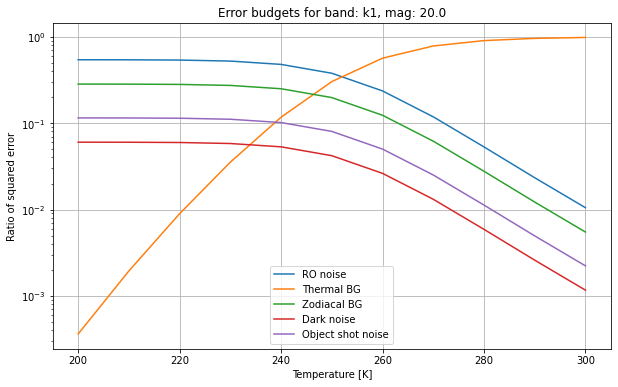

In [70]:
plt.figure(figsize=(10,6))
plt.title('Error budgets for band: {}, mag: {}'.format(band, mag))
plt.grid()
plt.yscale('log')
plt.xlabel('Temperature [K]')
plt.ylabel('Ratio of squared error')
plt.plot(tb_sols['temperature'], tb_sols['ron_sq']/tb_sols['total_noise'], label = 'RO noise')
plt.plot(tb_sols['temperature'], tb_sols['ph_th']/tb_sols['total_noise'], label = 'Thermal BG')
plt.plot(tb_sols['temperature'], tb_sols['ph_zd']/tb_sols['total_noise'], label = 'Zodiacal BG')
plt.plot(tb_sols['temperature'], tb_sols['ph_dk']/tb_sols['total_noise'], label = 'Dark noise')
plt.plot(tb_sols['temperature'], tb_sols['ph_obj']/tb_sols['total_noise'], label = 'Object shot noise')
plt.legend()
plt.show()

# Calculation for actual parameters.

In [71]:
from astropy.table import QTable
from scipy.optimize import fsolve
import sys

In [ ]:
tbls_fn = 'e_0100_tbl.pkl'

In [72]:
if os.path.exists(tbls_fn):
    with open(tbls_fn, 'rb') as pf:
        tbls = pickle.load(pf)
else:
    t1 = 200.0
    t2 = 300.0
    tn = 41
    n_pix = 9  # number of pixels of a photometry aperture.
    n_frames = 5 # number of frames.
    emissivity_m1 = 0.1
    tbls = {}
    sn_criterion = 10
    mag_solve_init = 20.0  # Initial magnitude for fsolve.
    for band in ['k0', 'k1', 'k2', 'k3']:
        print(band)
        temps = []
        mags = []
        counter = 0
        for temperature in np.linspace(t1, t2, tn):
            def func(x, params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion):
                return (get_signals_and_noises(params, temperature, x, band, n_pix, n_frames,
                                               cone_solangle, emissivity_m1)[3] -
                        sn_criterion)
            # Get solution of temperature for sn_ratio(temperature) = sn_criterion.
            root = fsolve(func, mag_solve_init,
                          args=(params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion))
            #for mag in np.linspace(15.0, 22.0, 101):
            #    #print(band, mag)
            #    result = get_signals_and_noises(params, temperature, mag, band, n_pix, n_frames, emissivity_m1)
            #    if result[3] < 10.0:
            #        temps.append(temperature)
         #        mags.append(mag)
         #        #print('{:s} {:.2f} {:.2f}'.format(band, temperature, mag))
         #        break
            temps.append(temperature)
            mags.append(root[0])
            sys.stdout.write(' {:d}'.format(counter))
            sys.stdout.flush()
            counter += 1
        sys.stdout.write('\n')
        t = QTable([np.array(temps), np.array(mags)], names=('temperature', 'mag'))
        tbls[band] = t
    with open(tbls_fn) as pf:
        pickle.dump(tbls_fn, pf)

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

/opt/anaconda3/envs/hzgdev/lib/python3.10/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



k1
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


In [78]:
#tbls_fn = 'e_0100_tbl.pkl'
#with open(tbls_fn, 'wb') as pf:
#    pickle.dump(tbls_fn, pf)

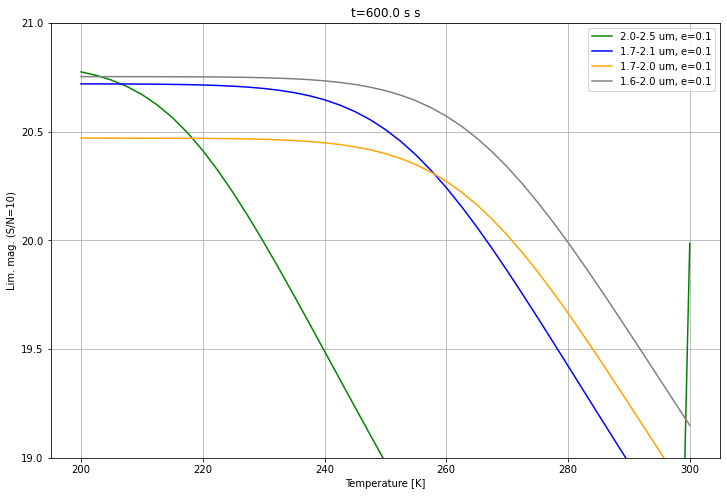

In [80]:
plt.figure(figsize=(12,8))
plt.grid()
#plt.xlim([18, 22])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('t={:.1f} s'.format(params.t_exp*n_frames))
plt.plot(tbls['k0']['temperature'], tbls['k0']['mag'], label = '2.0-2.5 um, e={}'.format(emissivity_m1), color='green')
plt.plot(tbls['k1']['temperature'], tbls['k1']['mag'], label = '1.7-2.1 um, e={}'.format(emissivity_m1), color='blue')
plt.plot(tbls['k2']['temperature'], tbls['k2']['mag'], label = '1.7-2.0 um, e={}'.format(emissivity_m1), color='orange')
plt.plot(tbls['k3']['temperature'], tbls['k3']['mag'], label = '1.6-2.0 um, e={}'.format(emissivity_m1), color='gray')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

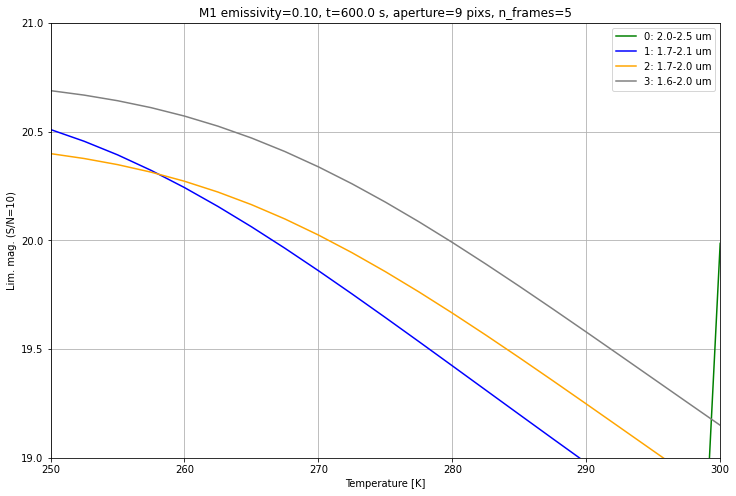

In [81]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([250, 300])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, t={:.1f}, aperture={} pixs, n_frames={}'.format(emissivity_m1, params.t_exp*n_frames, n_pix, n_frames))
plt.plot(tbls['k0']['temperature'], tbls['k0']['mag'], label = '0: 2.0-2.5 um', color='green')
plt.plot(tbls['k1']['temperature'], tbls['k1']['mag'], label = '1: 1.7-2.1 um', color='blue')
plt.plot(tbls['k2']['temperature'], tbls['k2']['mag'], label = '2: 1.7-2.0 um', color='orange')
plt.plot(tbls['k3']['temperature'], tbls['k3']['mag'], label = '3: 1.6-2.0 um', color='gray')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

In [82]:
from astropy.table import hstack, join

In [83]:
join(tbls['k0'], tbls['k1'], keys='temperature')

<QTable length=41>
temperature       mag_1              mag_2       
  float64        float64            float64      
----------- ------------------ ------------------
      200.0 20.774958324603535 20.719653070651127
      202.5 20.758917629640884 20.719535532506512
      205.0 20.737175305863758 20.719359161326842
      207.5 20.708298837332908  20.71909716700164
      210.0 20.670811162278067 20.718711776407186
      212.5  20.62335232147802  20.71815025429108
      215.0  20.56487569762534 20.717339704880594
      217.5 20.494832356963432  20.71618038391393
      220.0 20.413285862519956 20.714537250914734
      222.5 20.320916222869734 20.712229541694104
        ...                ...                ...
      277.5 17.702198287375207 19.534505674198947
      280.0 17.597036631565594 19.423000125630335
      282.5  17.49362853337914 19.311097404800556
      285.0 17.391939964456377 19.199243164529598
      287.5 17.291935868857642 19.087790524169563
      290.0  17.19358066000386  18.97701515104121
      292.5  17.09683859375133   18.8671291999428
      295.0  17.00167404730645 18.758293518967623
      297.5 16.908051726425487 18.650627965469777
      300.0  19.98602008675751 18.544219916896953

In [84]:
hstack([tbls['k0']['temperature'], hstack([tbls[key]['mag'] for key in tbls])]).show_in_notebook()

mag1: mag('k0'), mag2: mag('k1'), ...

Save table into an ASCII file.

In [85]:
tbls_stack = hstack([tbls['k0']['temperature'], hstack([tbls[key]['mag'] for key in tbls])])
tbls_stack.write('hgz_t_lmag_e0010_rev5.dat', format='ascii')

OSError: File hgz_t_lmag_e0010_rev5.dat already exists. If you mean to replace it then use the argument "overwrite=True".

In [87]:
!ls *.dat

hgz_t_lmag_e0010.dat      hgz_t_lmag_e0010_rev2.dat hgz_t_lmag_e0010_rev5.dat
hgz_t_lmag_e0010_rev.dat  hgz_t_lmag_e0010_rev4.dat


In [88]:
!head hgz_t_lmag_e0010_rev4.dat

temperature mag_1 mag_2 mag_3 mag_4
200.0 20.79837364131086 20.71978788451025 20.47023601574363 20.753001587850594
202.5 20.792060361419566 20.71974399645362 20.47022617647452 20.752992793926573
205.0 20.783318952047015 20.719678129133513 20.47021110076878 20.75297931707586
207.5 20.771379255657408 20.719580259966992 20.47018824272939 20.75295887873897
210.0 20.755312415138757 20.719436240916686 20.470153933747927 20.752928194493332
212.5 20.734045513442275 20.71922628567789 20.470102937716792 20.752882574972325
215.0 20.706406535542577 20.7189229744879 20.470027850154008 20.752815386413896
217.5 20.671206716353357 20.718488650803437 20.469918293910002 20.752717328088668
220.0 20.627358853269953 20.717872063585816 20.469759852445076 20.752575473188024


# Calculate temperatures achieving required limiting magnitudes.

In [89]:
lim_req = 20.0  # Required limitting magnitude.

In [90]:
from scipy import interpolate

In [91]:
temp_root = [[], []]
for i in range(0,4):
    print(i)
    f = interpolate.interp1d(tbls['k{}'.format(i)]['temperature'], tbls['k{}'.format(i)]['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root[0].append(i)
    temp_root[1].append(fsolve(f_solve, temp_ini)[0])

0
1
2
3


In [92]:
temp_root

[[0, 1, 2, 3],
 [229.83592281949205, 266.5948869698864, 270.7803171047743, 279.7540311472579]]

In [93]:
print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Case                       Temperature [K]')
for i in range(0, 4):
    print('Case {:} ({:.1f} - {:.1f}): {:.1f}'.format(temp_root[0][i], params.band_wls['k{:1d}'.format(i)][0],
                                                           params.band_wls['k{:1d}'.format(i)][1], temp_root[1][i]))

Lim mag = 20.0
M1_emissivity = 0.1
Case                       Temperature [K]
Case 0 (2.0 um - 2.5 um): 229.8
Case 1 (1.7 um - 2.1 um): 266.6
Case 2 (1.7 um - 2.0 um): 270.8
Case 3 (1.6 um - 2.0 um): 279.8


# Estimation of thermal stray light from the telescope structure.

In [95]:
# Thermal emission of instruments (nominal incident rays from M1).
band = 'k1'
temperature = 250.0
ph_th = (bb_photon_flux_density(temperature,
                                params.band_wls[band][0].value, params.band_wls[band][1].value) * \
    emissivity_m1 * \
    #params.t_exp * n_frames * (params.d_tel/2.0)**2.0*np.pi * params.eff_tel *
    # params.pix_fov * n_pix).decompose().value
    params.t_exp * n_frames * (params.pixsize**2) * n_pix * cone_solangle).decompose().value

In [96]:
ph_th

11673.963918802225

## Calculate thermal stray light from the telescope structure.

$$
p_{structure} = \int \frac{B(\lambda, T)}{hc/\lambda}\ d\lambda \times \Omega_{s} d_{pix}^2 N_{pix} t_{exp} N_{frames}\ \mathrm[photons]
$$

$$
\Omega_{s} = \Omega_{buf} - \Omega_{opt}, \\
\Omega_{opt} \sim \pi \left[\arctan\left(\frac{1}{2F}\right)\right]^2%% \sim 0.00784\ \mathrm{sr}\ (\mathrm{for}\  F=10), \\
%\Omega_{s}/\Omega_{opt} \sim 6.99\ (\mathrm{for}\ F=10, h_{buffle} = 100\ \mathrm{mm}, d_{det}=18.4 \mathrm{[mm}]), \\
%\Omega_{s} = \Omega_{opt} \times \left(\Omega_{s}/\Omega_{opt}\right)\sim 0.00784 \times 6.99 \sim 0.548\ \mathrm{sr}
$$

In [97]:
omega_s = 0.0548 * u.sr # Solid angle for thermal stray light.
d_pix = 18.0 * u.um  # Pixel size of H1RG array.
# n_pix = 9.0  # Number of pixels of a photometry aperture.
#params.t_exp = 120.0 * u.s  # Exposure time for one exposure.
#n_frames = 5  # Number of frames.
emissivity_structure = 0.1  # Emissivity of the telescope structure.

## Limitting magnitude for the structure with thermal emissivity = 0.3 along with h~100 mm buffle.b

factor_p_all

$$ f = 1+\left(\frac{\Omega_{buf}}{\Omega_{s}}-1\right)\frac{\epsilon_{st}}{\epsilon_{M1}} $$

$$ \Omega_{buf} = 2\pi \left(1-\cos\theta\right) = 2\pi \left(1-\frac{h}{\sqrt{r^2+h^2}}\right) $$

In [98]:
def sol_angle(r, h):
    return 2*np.pi*(1-h/math.sqrt(r**2+h**2))

In [ ]:
def factor(omega_s, omega_buf, e_st, e_m1):
    return 1+((omega_buf/omega_s).value-1) * e_st/e_m1

In [99]:
h = 100.0  # Buffle height (mm)
fval = 6.1  # F/#
d_det = 18.4  # Detector size. (mm)
e_st = 0.3  # Structure emissivity.

In [101]:
det_ratio = 1.0
r_opt = h/(2*fval)  # Main optical rays.
r_buf = 1/2*(d_det * det_ratio + h/fval)  # Buffered optical rays.

In [107]:
factor(cone_solangle, sol_angle(r_buf,h), e_st, emissivity_m1)

11.281091513169299

In [125]:
def get_limmag_table(cone_solangle, r_buf, h, e_st, emissivity_m1,
                     n_pix=9, n_frames=5,
                     sn_criterion=10):
    factor_p_all = factor(cone_solangle, sol_angle(r_buf, h), e_st, emissivity_m1)

    _t1 = 150.0
    _t2 = 300.0
    _tn = 41
    tbls = {}
    mag_solve_init = 17.0  # Initial magnitude for fsolve.
    for band in ['k0', 'k1', 'k2', 'k3']:
        print(band)
        temps = []
        mags = []
        counter = 0
        for temperature in np.linspace(_t1, _t2, _tn):
            def func(x, params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion):
                return (get_signals_and_noises(
                    params, temperature, x, band, n_pix, n_frames,emissivity_m1,
                    cone_solangle, factor_thermal=factor_p_all)[3] - sn_criterion)
           # Get solution of temperature for sn_ratio(temperature) = sn_criterion.
            root = fsolve(func, mag_solve_init,
                          args=(params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion))
            temps.append(temperature)
            mags.append(root[0])
            sys.stdout.write(' {:d}'.format(counter))
            sys.stdout.flush()
            counter += 1
        sys.stdout.write('\n')
        qt2 = QTable([np.array(temps), np.array(mags)], names=('temperature', 'mag'))
        tbls[band] = qt2
        temps = None
        mags = None
    return tbls

In [126]:
tbl_orig = get_limmag_table(cone_solangle, r_buf, h, e_st, emissivity_m1,
                            params.n_pix, params.n_frames, sn_criterion=10)

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k1
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


Dichroic prism case.

In [127]:
h_margin = 5.0  # Margin below the dichroic prism.
h_buf_w_dp = np.sqrt(3)/2 * d_det + h_margin

In [128]:
h_buf_w_dp, h

(20.93486742963367, 100.0)

In [129]:
tbls_dp = get_limmag_table(cone_solangle, r_buf, h_buf_w_dp, e_st, emissivity_m1,
                            params.n_pix, params.n_frames, sn_criterion=10)

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k1
 0 1 2

/opt/anaconda3/envs/hzgdev/lib/python3.10/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


In [131]:
h_buf_200 = 200.0
tbls_h200 = get_limmag_table(cone_solangle, r_buf, h_buf_200, e_st, emissivity_m1,
                             params.n_pix, params.n_frames, sn_criterion=10)

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k1
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


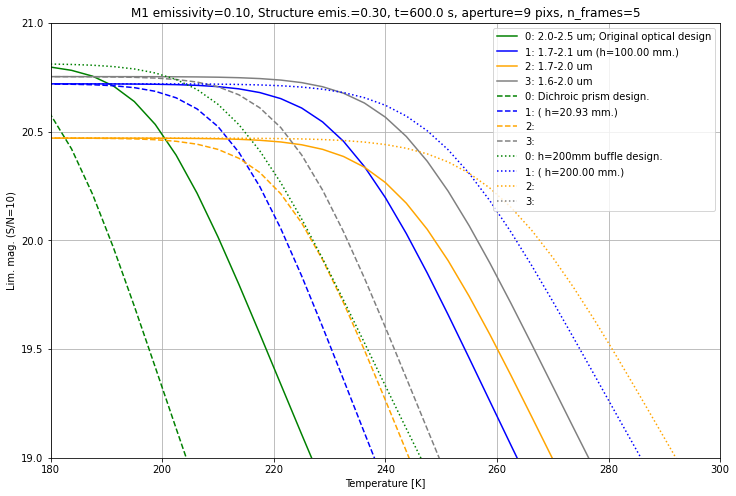

In [135]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([180, 300])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, Structure emis.={:.2f}, '
          't={:.1f}, aperture={} pixs, n_frames={}'.format(
    emissivity_m1, e_st, params.t_exp*n_frames, n_pix, n_frames))
plt.plot(tbl_orig['k0']['temperature'],
         tbl_orig['k0']['mag'], label = '0: 2.0-2.5 um; Original optical design', color='green')
plt.plot(tbl_orig['k1']['temperature'],
         tbl_orig['k1']['mag'], label = '1: 1.7-2.1 um (h={:.2f} mm.)'.format(h), color='blue')
plt.plot(tbl_orig['k2']['temperature'],
         tbl_orig['k2']['mag'], label = '2: 1.7-2.0 um', color='orange')
plt.plot(tbl_orig['k3']['temperature'],
         tbl_orig['k3']['mag'], label = '3: 1.6-2.0 um', color='gray')
plt.plot(tbls_dp['k0']['temperature'],
         tbls_dp['k0']['mag'], label = '0: Dichroic prism design.', color='green', linestyle='dashed')
plt.plot(tbls_dp['k1']['temperature'],
         tbls_dp['k1']['mag'], label = '1: ( h={:.2f} mm.)'.format(h_buf_w_dp), color='blue', linestyle='dashed')
plt.plot(tbls_dp['k2']['temperature'],
         tbls_dp['k2']['mag'], label = '2:', color='orange', linestyle='dashed')
plt.plot(tbls_dp['k3']['temperature'],
         tbls_dp['k3']['mag'], label = '3:', color='gray', linestyle='dashed')
plt.plot(tbls_h200['k0']['temperature'],
         tbls_h200['k0']['mag'], label = '0: h=200mm buffle design.',
         color='green', linestyle='dotted')
plt.plot(tbls_h200['k1']['temperature'],
         tbls_h200['k1']['mag'],
         label = '1: ( h={:.2f} mm.)'.format(h_buf_200),
         color='blue', linestyle='dotted')
plt.plot(tbls_h200['k2']['temperature'],
         tbls_h200['k2']['mag'], label = '2:', color='orange', linestyle='dotted')
plt.plot(tbls_h200['k3']['temperature'],
         label = '3:', color='gray', linestyle='dotted')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

In [112]:
temp_root2 = [[], []]
for i in range(0,4):
    print(i)
    f = interpolate.interp1d(tbls2['k{}'.format(i)]['temperature'], tbls2['k{}'.format(i)]['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root2[0].append(i)
    try:
        temp_root2[1].append(fsolve(f_solve, temp_ini)[0])
    except:
        temp_root2[1].append(0.0)

print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Case    Temperature [K]  structure=0.0   0.3')
for i in range(0, 4):
    print('Case {:} ({:.1f} - {:.1f}):   {:.1f}      {:.1f}'.format(temp_root[0][i], params.band_wls['k{:1d}'.format(i)][0],
                                                           params.band_wls['k{:1d}'.format(i)][1], temp_root[1][i],
                                                             temp_root2[1][i]))

0
1
2
3
Lim mag = 20.0
M1_emissivity = 0.1
Case    Temperature [K]  structure=0.0   0.3
Case 0 (2.0 um - 2.5 um):   229.8      0.0
Case 1 (1.7 um - 2.1 um):   266.6      244.4
Case 2 (1.7 um - 2.0 um):   270.8      248.9
Case 3 (1.6 um - 2.0 um):   279.8      256.5


In [89]:
det_ratio = 3.0/4.0  # 75 % of fthe detector.
r_buf = 1/2*(d_det * det_ratio + h/fval)
factor(cone_solangle, sol_angle(r_buf,h), 0.3, 0.1)

4.288305925824402

In [90]:
# Considering thermal emission from the structure. p_st/p_th ~ 3.0 * (0.3/0.1) ~ 9.0
# factor_p_all = p_st/p_th + 1
factor_p_all = factor(cone_solangle, sol_angle(r_buf,h), 0.3, 0.1)

t1 = 200.0
t2 = 300.0
tn = 41
n_pix = 9  # number of pixels of a photometry aperture.
n_frames = 5 # number of frames.
emissivity_m1 = 0.1
tbls2 = {}
sn_criterion = 10
mag_solve_init = 17.0  # Initial magnitude for fsolve.
for band in ['k0', 'k1', 'k2', 'k3']:
    print(band)
    temps = []
    mags = []
    counter = 0
    for temperature in np.linspace(t1, t2, tn):
        def func(x, params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion):
            return (get_signals_and_noises(params, temperature, x, band, n_pix, n_frames, emissivity_m1,
                                           cone_solangle, factor_thermal=factor_p_all)[3] -
                    sn_criterion)
        # Get solution of temperature for sn_ratio(temperature) = sn_criterion.
        root = fsolve(func, mag_solve_init,
                      args=(params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion))
        #for mag in np.linspace(15.0, 22.0, 101):
        #    #print(band, mag)
        #    result = get_signals_and_noises(params, temperature, mag, band, n_pix, n_frames, emissivity_m1)
        #    if result[3] < 10.0:
        #        temps.append(temperature)
        #        mags.append(mag)
        #        #print('{:s} {:.2f} {:.2f}'.format(band, temperature, mag))
        #        break
        temps.append(temperature)
        mags.append(root[0])
        sys.stdout.write(' {:d}'.format(counter))
        sys.stdout.flush()
        counter += 1
    sys.stdout.write('\n')
    qt2 = QTable([np.array(temps), np.array(mags)], names=('temperature', 'mag'))
    tbls2[band] = qt2

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k1
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


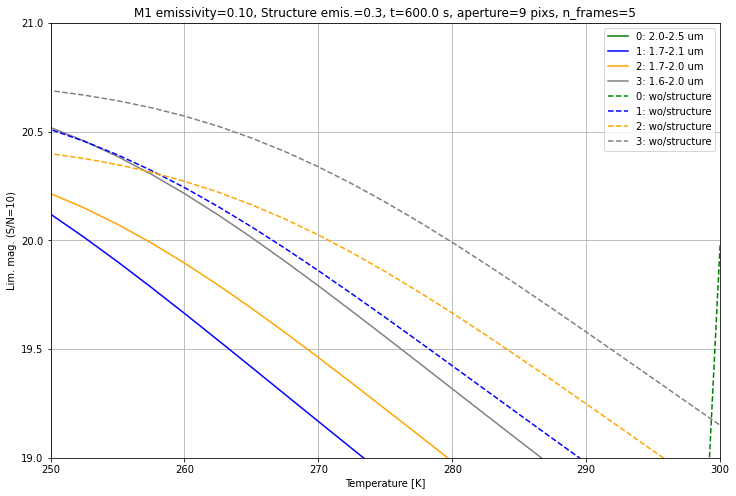

In [91]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([250, 300])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, Structure emis.=0.3, '
          't={:.1f}, aperture={} pixs, n_frames={}'.format(emissivity_m1, params.t_exp*n_frames, n_pix, n_frames))
plt.plot(tbls2['k0']['temperature'], tbls2['k0']['mag'], label = '0: 2.0-2.5 um', color='green')
plt.plot(tbls2['k1']['temperature'], tbls2['k1']['mag'], label = '1: 1.7-2.1 um', color='blue')
plt.plot(tbls2['k2']['temperature'], tbls2['k2']['mag'], label = '2: 1.7-2.0 um', color='orange')
plt.plot(tbls2['k3']['temperature'], tbls2['k3']['mag'], label = '3: 1.6-2.0 um', color='gray')
plt.plot(tbls['k0']['temperature'], tbls['k0']['mag'], label = '0: wo/structure', color='green', linestyle='dashed')
plt.plot(tbls['k1']['temperature'], tbls['k1']['mag'], label = '1: wo/structure', color='blue', linestyle='dashed')
plt.plot(tbls['k2']['temperature'], tbls['k2']['mag'], label = '2: wo/structure', color='orange', linestyle='dashed')
plt.plot(tbls['k3']['temperature'], tbls['k3']['mag'], label = '3: wo/structure', color='gray', linestyle='dashed')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

In [92]:
temp_root2 = [[], []]
for i in range(0,4):
    print(i)
    f = interpolate.interp1d(tbls2['k{}'.format(i)]['temperature'], tbls2['k{}'.format(i)]['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root2[0].append(i)
    temp_root2[1].append(fsolve(f_solve, temp_ini)[0])

print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Case    Temperature [K]  structure=0.0   0.3')
for i in range(0, 4):
    print('Case {:} ({:.1f} - {:.1f}):   {:.1f}      {:.1f}'.format(temp_root[0][i], params.band_wls['k{:1d}'.format(i)][0],
                                                           params.band_wls['k{:1d}'.format(i)][1], temp_root[1][i],
                                                             temp_root2[1][i]))

0
1
2
3
Lim mag = 20.0
M1_emissivity = 0.1
Case    Temperature [K]  structure=0.0   0.3
Case 0 (2.0 um - 2.5 um):   229.8      217.7
Case 1 (1.7 um - 2.1 um):   266.6      252.8
Case 2 (1.7 um - 2.0 um):   270.8      257.2
Case 3 (1.6 um - 2.0 um):   279.8      265.3


In [93]:
det_ratio = 2.0/4.0  # 50 % of the detector.
r_buf = 1/2*(d_det * det_ratio + h/fval)  #

In [94]:
factor(cone_solangle, sol_angle(r_buf,h), 0.3, 0.1)

2.1074835272477

In [95]:
# Considering thermal emission from the structure. p_st/p_th ~ 3.0 * (0.3/0.1) ~ 9.0
# factor_p_all = p_st/p_th + 1
factor_p_all = factor(cone_solangle, sol_angle(r_buf,h), 0.3, 0.1)

t1 = 200.0
t2 = 300.0
tn = 41
n_pix = 9  # number of pixels of a photometry aperture.
n_frames = 5 # number of frames.
emissivity_m1 = 0.1
tbls2 = {}
sn_criterion = 10
mag_solve_init = 17.0  # Initial magnitude for fsolve.
for band in ['k0', 'k1', 'k2', 'k3']:
    print(band)
    temps = []
    mags = []
    counter = 0
    for temperature in np.linspace(t1, t2, tn):
        def func(x, params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion):
            return (get_signals_and_noises(params, temperature, x, band, n_pix, n_frames, emissivity_m1,
                                           cone_solangle, factor_thermal=factor_p_all)[3] -
                    sn_criterion)
        # Get solution of temperature for sn_ratio(temperature) = sn_criterion.
        root = fsolve(func, mag_solve_init,
                      args=(params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion))
        #for mag in np.linspace(15.0, 22.0, 101):
        #    #print(band, mag)
        #    result = get_signals_and_noises(params, temperature, mag, band, n_pix, n_frames, emissivity_m1)
        #    if result[3] < 10.0:
        #        temps.append(temperature)
        #        mags.append(mag)
        #        #print('{:s} {:.2f} {:.2f}'.format(band, temperature, mag))
        #        break
        temps.append(temperature)
        mags.append(root[0])
        sys.stdout.write(' {:d}'.format(counter))
        sys.stdout.flush()
        counter += 1
    sys.stdout.write('\n')
    qt2 = QTable([np.array(temps), np.array(mags)], names=('temperature', 'mag'))
    tbls2[band] = qt2

k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k1
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k2
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
k3
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


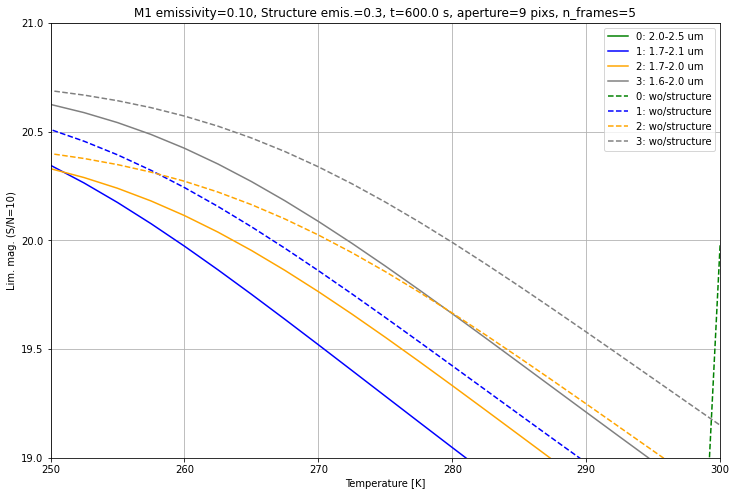

In [96]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([250, 300])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, Structure emis.=0.3, '
          't={:.1f}, aperture={} pixs, n_frames={}'.format(emissivity_m1, params.t_exp*n_frames, n_pix, n_frames))
plt.plot(tbls2['k0']['temperature'], tbls2['k0']['mag'], label = '0: 2.0-2.5 um', color='green')
plt.plot(tbls2['k1']['temperature'], tbls2['k1']['mag'], label = '1: 1.7-2.1 um', color='blue')
plt.plot(tbls2['k2']['temperature'], tbls2['k2']['mag'], label = '2: 1.7-2.0 um', color='orange')
plt.plot(tbls2['k3']['temperature'], tbls2['k3']['mag'], label = '3: 1.6-2.0 um', color='gray')
plt.plot(tbls['k0']['temperature'], tbls['k0']['mag'], label = '0: wo/structure', color='green', linestyle='dashed')
plt.plot(tbls['k1']['temperature'], tbls['k1']['mag'], label = '1: wo/structure', color='blue', linestyle='dashed')
plt.plot(tbls['k2']['temperature'], tbls['k2']['mag'], label = '2: wo/structure', color='orange', linestyle='dashed')
plt.plot(tbls['k3']['temperature'], tbls['k3']['mag'], label = '3: wo/structure', color='gray', linestyle='dashed')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

In [97]:
temp_root2 = [[], []]
for i in range(0,4):
    print(i)
    f = interpolate.interp1d(tbls2['k{}'.format(i)]['temperature'], tbls2['k{}'.format(i)]['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root2[0].append(i)
    temp_root2[1].append(fsolve(f_solve, temp_ini)[0])

print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Case    Temperature [K]  structure=0.0   0.3')
for i in range(0, 4):
    print('Case {:} ({:.1f} - {:.1f}):   {:.1f}      {:.1f}'.format(temp_root[0][i], params.band_wls['k{:1d}'.format(i)][0],
                                                           params.band_wls['k{:1d}'.format(i)][1], temp_root[1][i],
                                                             temp_root2[1][i]))

0
1
2
3
Lim mag = 20.0
M1_emissivity = 0.1
Case    Temperature [K]  structure=0.0   0.3
Case 0 (2.0 um - 2.5 um):   229.8      223.5
Case 1 (1.7 um - 2.1 um):   266.6      259.4
Case 2 (1.7 um - 2.0 um):   270.8      263.7
Case 3 (1.6 um - 2.0 um):   279.8      272.2


# Case 0 Temperature criterion
2022-06-14 H. Akitaya

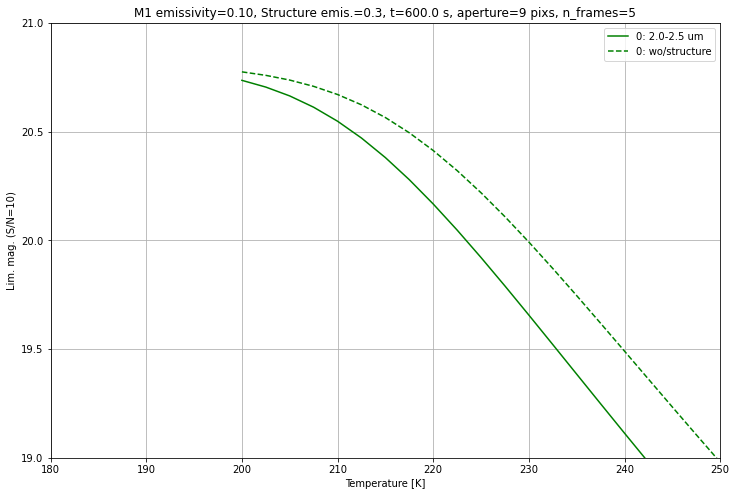

In [98]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([180, 250])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, Structure emis.=0.3, '
          't={:.1f}, aperture={} pixs, n_frames={}'.format(emissivity_m1, params.t_exp*n_frames, n_pix, n_frames))
plt.plot(tbls2['k0']['temperature'], tbls2['k0']['mag'], label = '0: 2.0-2.5 um', color='green')
plt.plot(tbls['k0']['temperature'], tbls['k0']['mag'], label = '0: wo/structure', color='green', linestyle='dashed')
plt.legend()
#plt.plot([17.0, 22.0], [10, 10])
plt.show()

In [99]:
def get_lmag_temp_tables(params: simimg.HZGParams, cone_solangle, r_buf=r_buf, h=h, em_structure=0.3, emissivity_m1=0.1):
    factor_p_all = factor(cone_solangle, sol_angle(r_buf,h), em_structure, emissivity_m1)
    t1 = 180.0
    t2 = 300.0
    tn = 41
    n_pix = 9  # number of pixels of a photometry aperture.
    n_frames = 5 # number of frames.
    # emissivity_m1 = 0.1
    tbls2 = {}
    sn_criterion = 10
    mag_solve_init = 17.0  # Initial magnitude for fsolve.
    for band in ['k0']:
        print(band)
        temps = []
        mags = []
        counter = 0
        for temperature in np.linspace(t1, t2, tn):
            def func(x, params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion):
                return (get_signals_and_noises(params, temperature, x, band, n_pix, n_frames, emissivity_m1,
                                               cone_solangle, factor_thermal=factor_p_all)[3] -
                        sn_criterion)
            # Get solution of temperature for sn_ratio(temperature) = sn_criterion.
            root = fsolve(func, mag_solve_init,
                          args=(params, temperature, band, n_pix, n_frames, emissivity_m1, sn_criterion))
            temps.append(temperature)
            mags.append(root[0])
            sys.stdout.write(' {:d}'.format(counter))
            sys.stdout.flush()
            counter += 1
        sys.stdout.write('\n')
        qt2 = QTable([np.array(temps), np.array(mags)], names=('temperature', 'mag'))
        tbls2[band] = qt2
    return tbls2

In [100]:
em_structures = np.linspace(0, 6, 7) * 0.1
tbls_k0 = {}
for em_structure in em_structures:
    print('emissivity: {:.1f}'.format(em_structure))
    tbls_k0[em_structure] = get_lmag_temp_tables(params, cone_solangle, r_buf=r_buf, h=h, em_structure=em_structure, emissivity_m1=0.1)

emissivity: 0.0
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.1
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.2
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.3
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.4
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.5
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
emissivity: 0.6
k0
 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40


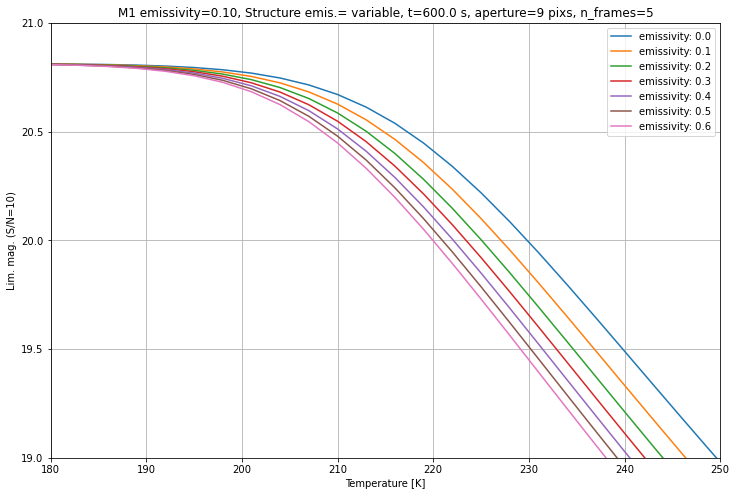

In [101]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlim([180, 250])
plt.ylim([19,21])
plt.xlabel('Temperature [K]')
plt.ylabel('Lim. mag. (S/N={})'.format(sn_criterion))
plt.yticks(np.linspace(19, 21, 5))
plt.title('M1 emissivity={:.2f}, Structure emis.= variable, '
          't={:.1f}, aperture={} pixs, n_frames={}'.format(emissivity_m1, params.t_exp*n_frames, n_pix, n_frames))
for em_structure in tbls_k0.keys():
    plt.plot(tbls_k0[em_structure]['k0']['temperature'], tbls_k0[em_structure]['k0']['mag'], label = 'emissivity: {:.1f}'.format(em_structure))
plt.legend()
plt.show()


In [102]:
temp_root2 = [[], []]
lim_req = 20.5
for em_structure in em_structures:
    f = interpolate.interp1d(tbls_k0[em_structure]['k0']['temperature'], tbls_k0[em_structure]['k0']['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root2[0].append(em_structure)
    temp_root2[1].append(fsolve(f_solve, temp_ini)[0])

print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Structure_emissivity Temperature')
i=0
for em_structure in em_structures:
    print('{:.2f}                 {:.2f}'.format(em_structure, temp_root2[1][i]))
    i+=1

Lim mag = 20.5
M1_emissivity = 0.1
Structure_emissivity Temperature
0.00                 217.33
0.10                 214.88
0.20                 213.05
0.30                 211.60
0.40                 210.40
0.50                 209.37
0.60                 208.48


In [103]:
temp_root3 = [[], []]
lim_req = 20.0
for em_structure in em_structures:
    f = interpolate.interp1d(tbls_k0[em_structure]['k0']['temperature'], tbls_k0[em_structure]['k0']['mag'], kind='cubic')
    def f_solve(x):
        return f(x) - lim_req
    temp_ini = 280.0
    temp_root3[0].append(em_structure)
    temp_root3[1].append(fsolve(f_solve, temp_ini)[0])

print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Structure_emissivity Temperature')
i=0
for em_structure in em_structures:
    print('{:.2f}                 {:.2f}'.format(em_structure, temp_root3[1][i]))
    i+=1

Lim mag = 20.0
M1_emissivity = 0.1
Structure_emissivity Temperature
0.00                 229.84
0.10                 227.10
0.20                 225.07
0.30                 223.45
0.40                 222.11
0.50                 220.97
0.60                 219.98


In [104]:
print('Lim mag = {}'.format(lim_req))
print('M1_emissivity = {}'.format(emissivity_m1))
print('Structure_emissivity Temperature(20.0mag) (20.5mag)')
i=0
for em_structure in em_structures:
    print('{:.2f}                 {:.2f}               {:.2f}'.format(em_structure, temp_root3[1][i], temp_root2[1][i]))
    i+=1

Lim mag = 20.0
M1_emissivity = 0.1
Structure_emissivity Temperature(20.0mag) (20.5mag)
0.00                 229.84               217.33
0.10                 227.10               214.88
0.20                 225.07               213.05
0.30                 223.45               211.60
0.40                 222.11               210.40
0.50                 220.97               209.37
0.60                 219.98               208.48


In [105]:
temp_root_merge = temp_root2 + temp_root3

In [106]:
temp_root_merge

[[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001],
 [217.328682472603,
  214.8769131485159,
  213.05020163762975,
  211.59843641583433,
  210.3967174350346,
  209.37281217659515,
  208.48194736303557],
 [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001],
 [229.8359387383696,
  227.10151237557426,
  225.06620567805172,
  223.45026206824696,
  222.11320797938686,
  220.9748092308592,
  219.98484428365657]]

In [107]:
temp_root_ndarray = np.array(list(temp_root_merge))

In [108]:
derivative = (20.5-20.0) / (temp_root_ndarray[3] - temp_root_ndarray[2] )*10

In [109]:
derivative

array([0.02175465, 0.02202628, 0.02223544, 0.02240643, 0.02255166,
       0.02267833, 0.022791  ])

In [110]:
np.stack([temp_root_ndarray, derivative], 1)

ValueError: all input arrays must have the same shape

In [ ]:
temp_criterion_tbl = Table(rows=(temp_root_merge, derivative), names=('emissivity', 'lmag20.5', 'lmag21.0', 'lmag_per_10k'))

In [ ]:
temp_criterion_tbl